Fabian Gonzalez Vera | A01367585

In [47]:
# industria asignada - Manufacturing industries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
dataf = pd.read_csv('dataus2023.csv')
firmf = pd.read_csv('firmsus2023.csv')
print(dataf.shape, firmf.shape)

(533088, 21) (5615, 7)


merge industry with data

In [50]:
dataf['qdate'] = pd.PeriodIndex(dataf.q, freq='Q')

In [51]:
firmf.columns

Index(['empresa', 'Nombre', 'status', 'partind', 'naics1', 'naics2',
       'SectorEconomatica'],
      dtype='object')

In [52]:
firms = firmf[['empresa','Nombre','status','naics1']]
firms.columns=['firm','empresa','status', 'industria']

dataf = pd.merge(dataf, firms, on='firm', how='left')
dataf.head()



,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate,empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.33,104.00,"452,000.00",NaN,2000,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",0.00,0.00,"161,000.00",...,0.00,44.91,73.75,"452,271.97","1,453,000.00",2000,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",0.00,0.00,"244,000.00",...,0.00,29.80,48.94,"453,014.58","1,581,000.00",2000,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",0.00,0.00,"407,000.00",...,0.00,33.34,54.75,"456,366.38","1,741,000.00",2000,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00","-25,000.00",0.00,"119,000.00",...,0.00,18.71,30.73,"456,769.74","1,821,000.00",2001,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras


In [53]:
dataf.columns

Index(['firm', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding',
       'fixedassets', 'year', 'qdate', 'empresa', 'status', 'industria'],
      dtype='object')

## 1.1 Calculation of financial variables and ratios

Calculate log quarterly returns (rq) and log annual returns (ry).

In [54]:
dataf.set_index(['firm','qdate'],inplace=True)
dataf['ry'] = np.log(dataf['adjprice']) - np.log(dataf.groupby(['firm'])['adjprice'].shift(4))

In [55]:

dataf['rq'] = np.log(dataf['adjprice']) - np.log(dataf.groupby(['firm'])['adjprice'].shift(1))

In [56]:
# calulo retornos un año en el futuro

dataf['f1rq'] = dataf['rq'].shift(-1)
dataf['f4rq'] = dataf['ry'].shift(-4)

In [57]:
dataf[['rq','f1rq','ry','f4rq']].head(10)

rq  f1rq    ry  f4rq
firm qdate                         
A    2000Q1   NaN -0.34   NaN -1.22
     2000Q2 -0.34 -0.41   NaN -0.82
     2000Q3 -0.41  0.11   NaN -0.92
     2000Q4  0.11 -0.58   NaN -0.65
     2001Q1 -0.58  0.06 -1.22  0.13
     2001Q2  0.06 -0.51 -0.82 -0.32
     2001Q3 -0.51  0.38 -0.92 -0.40
     2001Q4  0.38  0.20 -0.65 -0.46
     2002Q1  0.20 -0.39  0.13 -0.98
     2002Q2 -0.39 -0.59 -0.32 -0.19

Calculate operating profit (also called earnings before interest and taxes) : ebit = revenue - cogs - sgae


In [58]:
dataf['ebit'] = dataf['revenue'] - dataf['cogs'] - dataf['sgae']


Calculate operating profit margin: opm = ebit / revenue

In [59]:
dataf['opm'] = np.where(dataf['revenue']==0, np.NaN, dataf['ebit']/dataf['revenue'])

Calculate net income as: netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax

In [60]:
dataf['netincome'] = dataf['ebit'] + dataf['otherincome'] + dataf['extraordinaryitems'] - dataf['finexp'] - dataf['incometax']

Calculate profit margin (ratio) as: pm = ni / revenue

In [61]:
dataf['pm'] = np.where(dataf['revenue']==0, np.NaN, dataf['netincome']/dataf['revenue'])

Calculate asset turn over ratio: ato = revenue / totalassets

In [62]:
dataf['ato'] = np.where(dataf['totalassets']==0, np.NaN, dataf['revenue']/dataf['totalassets'])

Calculate acid ratio: acidratio = currentassets / currentliabilities

In [63]:
dataf['acidratio'] = np.where(dataf['currentliabilities']==0, np.NaN, dataf['currentassets']/dataf['currentliabilities'])

Calculate financial leverage ratio as: finlev=longdebt / totalassets

In [64]:
# financial leverage, que tanto la empresa debe con respecto a lo que tiene en activos
dataf['finlev'] = np.where(dataf['totalassets']==0, np.NaN, dataf['longdebt']/dataf['totalassets'])

Calculate market value as: mvalue = originalprice * sharesoutstanding

In [65]:
dataf['mvalue'] = dataf['originalprice'] * dataf['sharesoutstanding']

Calculate book value as: bookvalue = totalassets - totalliabilities

In [66]:
dataf['bookvalue'] = dataf['totalassets'] - dataf['totalliabilities']

In [67]:
dataf.columns

Index(['q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding',
       'fixedassets', 'year', 'empresa', 'status', 'industria', 'ry', 'rq',
       'f1rq', 'f4rq', 'ebit', 'opm', 'netincome', 'pm', 'ato', 'acidratio',
       'finlev', 'mvalue', 'bookvalue'],
      dtype='object')

In [68]:
dataf.head()

q  fiscalmonth       revenue         cogs         sgae  \
firm qdate                                                                 
A    2000Q1  2000q1          NaN           NaN          NaN          NaN   
     2000Q2  2000q2         6.00  4,731,000.00 2,421,000.00 1,925,000.00   
     2000Q3  2000q3         9.00  7,401,000.00 3,790,000.00 3,016,000.00   
     2000Q4  2000q4        12.00 10,773,000.00 5,522,000.00 4,198,000.00   
     2001Q1  2001q1         3.00  2,841,000.00 1,449,000.00 1,113,000.00   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     
A    2000Q1          NaN                 NaN     NaN        NaN          NaN   
     2000Q2    73,000.00                0.00    0.00 161,000.00 7,321,000.00   
     2000Q3   101,000.00                0.00    0.00 244,000.00 7,827,000.00   
     2000Q4   111,000.00                0.00    0.00 407,000.00 8,425,000.00   
     2001Q1    19,000.00          -25,000.00    0.00 119,000.00 9,208,000.00   

             ...  f4rq         ebit  opm  netincome   pm  ato  acidratio  \
firm qdate   ...                                                           
A    2000Q1  ... -1.22          NaN  NaN        NaN  NaN  NaN        NaN   
     2000Q2  ... -0.82   385,000.00 0.08 297,000.00 0.06 0.65       2.31   
     2000Q3  ... -0.92   595,000.00 0.08 452,000.00 0.06 0.95       2.13   
     2000Q4  ... -0.65 1,053,000.00 0.10 757,000.00 0.07 1.28       2.05   
     2001Q1  ...  0.13   279,000.00 0.10 154,000.00 0.05 0.31       1.78   

             finlev        mvalue    bookvalue  
firm qdate                                      
A    2000Q1     NaN 47,008,000.00          NaN  
     2000Q2    0.00 33,355,057.57 4,642,000.00  
     2000Q3    0.00 22,169,400.96 4,902,000.00  
     2000Q4    0.00 24,986,059.36 5,265,000.00  
     2001Q1    0.00 14,036,533.81 5,541,000.00  

[5 rows x 36 columns]

## 1.2 Firm Composition of the US financial market

Show how many active firms by industry there are in the sample

In [69]:
pd.options.display.float_format = '{:,.2f}'.format
# vemos que valores hay en estatus
print(dataf.status.unique())
active_2023q2 = dataf.loc[(dataf['status']=='activo') & (dataf['q']=='2023q2')]
#print(active_2023q2)

active_2023q2[['industria','empresa']].groupby('industria').count()


['activo' 'cancelado']


,empresa
industria,
-,2
"Agricultura, ganadería, aprovechamiento forestal, pesca y caza",17
Comercio al por mayor,79
Comercio al por menor,145
Construcción,46
"Empresas de electricidad, gas y agua",77
Industrias manufactureras,1540
Información en medios masivos,256
"Minería, explotación de canteras y extracción de petróleo y gas",113


In [70]:
active_2023q2

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2023Q2,2023q2,6.00,"3,473,000.00","1,581,000.00","1,083,000.00","6,000.00",0.00,"28,000.00","133,000.00","10,792,000.00",...,NaN,"809,000.00",0.23,"654,000.00",0.19,0.32,2.37,0.25,"35,518,942.11","5,781,000.00"
AA,2023Q2,2023q2,6.00,"5,354,000.00","4,919,000.00","601,000.00","-60,000.00","20,000.00","53,000.00","74,000.00","14,128,000.00",...,NaN,"-166,000.00",-0.03,"-333,000.00",-0.06,0.38,1.80,0.13,"6,053,162.45","6,458,000.00"
AAIC,2023Q2,2023q2,6.00,"26,716.00","16,512.00",NaN,0.00,NaN,0.00,"1,496.00","817,470.00",...,NaN,NaN,NaN,NaN,NaN,0.03,NaN,0.11,"162,125.89","220,012.00"
AAL,2023Q2,2023q2,6.00,"26,244,000.00",0.00,"23,644,000.00","-21,000.00",0.00,"800,000.00","431,000.00","67,260,000.00",...,NaN,"2,600,000.00",0.10,"1,348,000.00",0.05,0.39,0.75,0.46,"11,712,353.39","-4,385,000.00"
AAME,2023Q2,2023q2,6.00,"95,457.00",0.00,NaN,0.00,NaN,0.00,101.00,"372,955.00",...,NaN,NaN,NaN,NaN,NaN,0.26,NaN,NaN,"39,381.07","103,486.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUMZ,2023Q2,2023q2,3.00,"182,887.00","133,529.00","70,712.00",-541.00,0.00,-858.00,"-2,655.00","741,498.00",...,NaN,"-21,354.00",-0.12,"-18,382.00",-0.10,0.25,2.09,0.25,"329,525.57","391,843.00"
ZUO,2023Q2,2023q2,3.00,"103,095.00","37,346.00","85,928.00","5,740.00",0.00,"4,387.00",469.00,"673,163.00",...,NaN,"-20,179.00",-0.20,"-19,295.00",-0.19,0.15,1.69,0.38,"1,505,084.00","103,683.00"
ZVIA,2023Q2,2023q2,6.00,"85,541.00","45,744.00","48,425.00",743.00,"1,899.00",0.00,36.00,"115,542.00",...,NaN,"-8,628.00",-0.10,"-6,022.00",-0.07,0.74,3.00,0.01,"304,484.92","78,626.00"


For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

In [71]:
industrysummary = active_2023q2.groupby('industria').agg(
    {
        'empresa': ['count'],
        'mvalue': ['min','max','median','std'],
        'bookvalue': ['min','max','median','std'],
    }
)
industrysummary

empresa       mvalue  \
                                                     count          min   
industria                                                                 
-                                                        2 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...      17     3,687.58   
Comercio al por mayor                                   79     5,458.41   
Comercio al por menor                                  145     3,795.68   
Construcción                                            46     2,212.28   
Empresas de electricidad, gas y agua                    77    33,728.24   
Industrias manufactureras                             1540       796.17   
Información en medios masivos                          256     3,256.72   
Minería, explotación de canteras y extracción d...     113        34.17   
Otros servicios excepto actividades gubernament...      17    16,742.10   
Servicios de alojamiento temporal y de preparac...      71     9,806.64   
Servicios de apoyo a los negocios y manejo de r...     128     2,802.16   
Servicios de esparcimiento culturales y deporti...      24     3,092.33   
Servicios de salud y de asistencia social               63       717.42   
Servicios educativos                                    13    83,986.36   
Servicios financieros y de seguros                     686     5,559.04   
Servicios inmobiliarios y de alquiler de bienes...      68     3,440.61   
Servicios profesionales, científicos y técnicos        137     3,638.32   
Transportes, correos y almacenamiento                   70    29,816.46   

                                                                     \
                                                                max   
industria                                                             
-                                                      5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    45,050,089.23   
Comercio al por mayor                                 57,645,136.00   
Comercio al por menor                              1,337,539,706.77   
Construcción                                          41,504,950.92   
Empresas de electricidad, gas y agua                 150,159,578.58   
Industrias manufactureras                          3,050,896,326.94   
Información en medios masivos                      2,532,080,938.79   
Minería, explotación de canteras y extracción d...    69,808,657.11   
Otros servicios excepto actividades gubernament...     9,764,061.13   
Servicios de alojamiento temporal y de preparac...   217,470,301.71   
Servicios de apoyo a los negocios y manejo de r...   444,875,318.55   
Servicios de esparcimiento culturales y deporti...   163,141,789.33   
Servicios de salud y de asistencia social             83,514,600.50   
Servicios educativos                                   3,171,234.18   
Servicios financieros y de seguros                   750,735,436.68   
Servicios inmobiliarios y de alquiler de bienes...   195,201,712.35   
Servicios profesionales, científicos y técnicos    1,519,830,900.00   
Transportes, correos y almacenamiento                153,955,377.34   

                                                                 \
                                                         median   
industria                                                         
-                                                  5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...   857,921.50   
Comercio al por mayor                              1,450,954.00   
Comercio al por menor                              1,662,158.77   
Construcción                                       2,559,768.80   
Empresas de electricidad, gas y agua               5,192,340.89   
Industrias manufactureras                            684,326.81   
Información en medios masivos                      2,370,194.81   
Minería, explotación de canteras y extracción d... 1,118,078.70   
Otros servicios excepto actividad

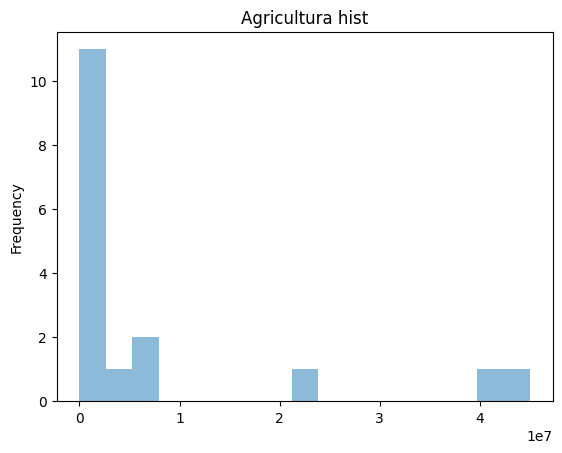

In [72]:
indDF = active_2023q2.loc[(active_2023q2['industria']=='Agricultura, ganadería, aprovechamiento forestal, pesca y caza')]
mval = indDF['mvalue']
hist=mval.plot.hist(bins=17,alpha=0.5,title="Agricultura hist")

Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [73]:
active_2023q2[['mvalue','empresa','industria']].sort_values(by='mvalue',ascending=False).head(10)

,,mvalue,empresa,industria
firm,qdate,,,
AAPL,2023Q2,"3,050,896,326.94",Apple Inc,Industrias manufactureras
MSFT,2023Q2,"2,532,080,938.79",Microsoft Corp,Información en medios masivos
GOOGL,2023Q2,"1,519,830,900.00",Alphabet Inc,"Servicios profesionales, científicos y técnicos"
AMZN,2023Q2,"1,337,539,706.77","Amazon.Com, Inc",Comercio al por menor
NVDA,2023Q2,"1,044,859,400.00",Nvidia Corp,Industrias manufactureras
TSLA,2023Q2,"829,681,140.87","Tesla, Inc",Industrias manufactureras
BRK_A,2023Q2,"750,735,436.68",Berkshire Hathaway Inc,Servicios financieros y de seguros
META,2023Q2,"735,452,839.12","Meta Platforms, Inc","Servicios profesionales, científicos y técnicos"
UNH,2023Q2,"447,491,234.90",Unitedhealth Group Inc,Servicios financieros y de seguros


Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [74]:
active_2023q2.columns

Index(['q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding',
       'fixedassets', 'year', 'empresa', 'status', 'industria', 'ry', 'rq',
       'f1rq', 'f4rq', 'ebit', 'opm', 'netincome', 'pm', 'ato', 'acidratio',
       'finlev', 'mvalue', 'bookvalue'],
      dtype='object')

In [75]:
active_2023q2[['bookvalue','empresa','industria']].sort_values(by='bookvalue',ascending=False).head(10)

,,bookvalue,empresa,industria
firm,qdate,,,
BRK_A,2023Q2,"539,883,000.00",Berkshire Hathaway Inc,Servicios financieros y de seguros
JPM,2023Q2,"312,516,000.00",Jpmorgan Chase & Co,Servicios financieros y de seguros
BAC,2023Q2,"283,319,000.00",Bank Of America Corp,Servicios financieros y de seguros
GOOGL,2023Q2,"267,141,000.00",Alphabet Inc,"Servicios profesionales, científicos y técnicos"
C,2023Q2,"209,422,000.00",Citigroup Inc,Servicios financieros y de seguros
XOM,2023Q2,"206,997,000.00",Exxon Mobil Corp,Industrias manufactureras
MSFT,2023Q2,"206,223,000.00",Microsoft Corp,Información en medios masivos
WFC,2023Q2,"181,952,000.00",Wells Fargo & Company,Servicios financieros y de seguros
AMZN,2023Q2,"168,602,000.00","Amazon.Com, Inc",Comercio al por menor


## 1.3 Evolution of the US financial market

Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :

How the total market value of the US market has changed over the years? Do a table and/or graph and explain

In [76]:
dataYearly = dataf[(dataf['fiscalmonth']==12)]
fmarket = dataYearly[['year', 'mvalue', 'revenue', 'netincome']].groupby('year').sum()
fmarket

,mvalue,revenue,netincome
year,,,
2000,"12,814,978,634.15","6,380,672,838.05","344,723,426.83"
2001,"11,494,392,671.37","7,493,006,671.41","67,530,325.20"
2002,"9,494,723,157.61","7,320,441,084.79","-57,773,458.77"
2003,"11,675,951,523.21","7,924,776,768.22","364,552,095.88"
2004,"13,230,878,635.88","8,816,237,201.06","431,717,996.76"
2005,"13,789,108,526.52","9,645,438,810.16","522,880,104.83"
2006,"15,461,254,772.55","10,540,362,264.44","657,926,147.83"
2007,"16,149,130,338.06","11,256,645,716.63","610,497,891.61"
2008,"10,395,016,561.41","11,607,977,855.77","342,187,423.38"


How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain

In [77]:
dataYearly = dataf[(dataf['fiscalmonth']==12)]
usfirms = dataYearly[['year', 'empresa','mvalue', 'revenue', 'netincome']].groupby(['year','empresa']).sum()
usfirms

mvalue       revenue    netincome
year empresa                                                             
2000 1 800 Flowers Com Inc          328,875.93    385,250.00   -66,830.00
     3M Company                  47,529,232.53 16,724,000.00 1,782,000.00
     3com Corp                   20,216,727.88  4,333,942.00   674,303.00
     3d Systems Corp                      0.00    109,675.00     8,144.00
     7 Eleven Inc                   916,690.22  9,451,047.00   108,292.00
...                                        ...           ...          ...
2023 Worthington Industries, Inc  3,456,505.21  4,916,392.00   256,528.00
     Yext, Inc                    1,173,426.35    400,850.00   -65,938.00
     Zoom Video Comm, Inc        21,696,878.74  4,392,960.00   103,711.00
     Zumiez Inc                     359,387.91    958,380.00    21,034.00
     Zuora, Inc                   1,338,740.00    396,087.00  -197,970.00

[58994 rows x 3 columns]

## 1.4 Learing about one industry

In [78]:
# industria asignada - Manufacturing industries
manufacturyInds = dataf.loc[(dataf['industria']=='Industrias manufactureras')]
manufacturyInds

q  fiscalmonth       revenue         cogs         sgae  \
firm qdate                                                                 
A    2000Q1  2000q1          NaN           NaN          NaN          NaN   
     2000Q2  2000q2         6.00  4,731,000.00 2,421,000.00 1,925,000.00   
     2000Q3  2000q3         9.00  7,401,000.00 3,790,000.00 3,016,000.00   
     2000Q4  2000q4        12.00 10,773,000.00 5,522,000.00 4,198,000.00   
     2001Q1  2001q1         3.00  2,841,000.00 1,449,000.00 1,113,000.00   
...             ...          ...           ...          ...          ...   
ZYNE 2022Q3  2022q3         9.00          0.00         0.00    26,565.56   
     2022Q4  2022q4        12.00          0.00         0.00    35,251.54   
     2023Q1  2023q1         3.00          0.00         0.00    10,471.17   
     2023Q2  2023q2         6.00          0.00         0.00    21,607.38   
     2023Q3  2023q3          NaN           NaN          NaN          NaN   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     
A    2000Q1          NaN                 NaN     NaN        NaN          NaN   
     2000Q2    73,000.00                0.00    0.00 161,000.00 7,321,000.00   
     2000Q3   101,000.00                0.00    0.00 244,000.00 7,827,000.00   
     2000Q4   111,000.00                0.00    0.00 407,000.00 8,425,000.00   
     2001Q1    19,000.00          -25,000.00    0.00 119,000.00 9,208,000.00   
...                  ...                 ...     ...        ...          ...   
ZYNE 2022Q3      -893.80                0.00 -439.59       0.00    62,366.74   
     2022Q4      -631.13                0.00 -846.86       0.00    55,520.89   
     2023Q1       -89.98               -0.00 -447.31       0.00    48,636.53   
     2023Q2      -164.56                0.00 -882.03       0.00    40,476.56   
     2023Q3          NaN                 NaN     NaN        NaN          NaN   

             ...  f4rq         ebit  opm  netincome   pm  ato  acidratio  \
firm qdate   ...                                                           
A    2000Q1  ... -1.22          NaN  NaN        NaN  NaN  NaN        NaN   
     2000Q2  ... -0.82   385,000.00 0.08 297,000.00 0.06 0.65       2.31   
     2000Q3  ... -0.92   595,000.00 0.08 452,000.00 0.06 0.95       2.13   
     2000Q4  ... -0.65 1,053,000.00 0.10 757,000.00 0.07 1.28       2.05   
     2001Q1  ...  0.13   279,000.00 0.10 154,000.00 0.05 0.31       1.78   
...          ...   ...          ...  ...        ...  ...  ...        ...   
ZYNE 2022Q3  ...  0.59   -26,565.56  NaN -27,019.77  NaN 0.00       6.45   
     2022Q4  ...   NaN   -35,251.54  NaN -35,035.81  NaN 0.00       5.97   
     2023Q1  ...   NaN   -10,471.17  NaN -10,113.84  NaN 0.00       4.95   
     2023Q2  ...   NaN   -21,607.38  NaN -20,889.91  NaN 0.00       3.43   
     2023Q3  ...   NaN          NaN  NaN        NaN  NaN  NaN        NaN   

             finlev        mvalue    bookvalue  
firm qdate                                      
A    2000Q1     NaN 47,008,000.00          NaN  
     2000Q2    0.00 33,355,057.57 4,642,000.00  
     2000Q3    0.00 22,169,400.96 4,902,000.00  
     2000Q4    0.00 24,986,059.36 5,265,000.00  
     2001Q1    0.00 14,036,533.81 5,541,000.00  
...             ...           ...          ...  
ZYNE 2022Q3    0.00     33,491.25    52,756.75  
     2022Q4    0.00     24,943.24    46,228.76  
     2023Q1    0.00     22,941.57    38,966.55  
     2023Q2    0.00     17,490.71    29,020.57  
     2023Q3     NaN     71,200.05          NaN  

[216105 rows x 36 columns]

In [79]:
manufacturyInds[['industria','empresa']].groupby('industria').count()

,empresa
industria,
Industrias manufactureras,216105


### 1.4.1 Descriptive statistics for your industry

Using the subsample of your industry and using annual fiscal information (selecting rows with fiscalmonth=12), and the most recent complete year (2022), do the following:

In [80]:
MIy = manufacturyInds.loc[(manufacturyInds['status']=='activo') & (manufacturyInds['fiscalmonth']==12)]
#MIy2022= manufacturyInds.loc[(manufacturyInds['status']=='activo') & (manufacturyInds['year']=='2022') & (manufacturyInds['fiscalmonth']==12)]
MIy.head()

q  fiscalmonth       revenue         cogs         sgae  \
firm qdate                                                                 
A    2000Q4  2000q4        12.00 10,773,000.00 5,522,000.00 4,198,000.00   
     2001Q4  2001q4        12.00  8,396,000.00 5,166,000.00 4,008,000.00   
     2002Q4  2002q4        12.00  6,010,000.00 3,694,000.00 3,923,000.00   
     2003Q4  2003q4        12.00  6,056,000.00 3,762,000.00 3,019,000.00   
     2004Q4  2004q4        12.00  7,181,000.00 4,058,000.00 2,737,000.00   

             otherincome  extraordinaryitems  finexp    incometax  \
firm qdate                                                          
A    2000Q4   111,000.00                0.00    0.00   407,000.00   
     2001Q4   301,000.00          580,000.00    0.00   -71,000.00   
     2002Q4    60,000.00          -10,000.00    0.00  -525,000.00   
     2003Q4    35,000.00         -268,000.00    0.00 1,100,000.00   
     2004Q4    54,000.00                0.00    0.00    91,000.00   

             totalassets  ...  f4rq          ebit   opm     netincome    pm  \
firm qdate                ...                                                 
A    2000Q4 8,425,000.00  ... -0.65  1,053,000.00  0.10    757,000.00  0.07   
     2001Q4 7,986,000.00  ... -0.46   -778,000.00 -0.09    174,000.00  0.02   
     2002Q4 8,203,000.00  ...  0.49 -1,607,000.00 -0.27 -1,032,000.00 -0.17   
     2003Q4 6,297,000.00  ... -0.19   -725,000.00 -0.12 -2,058,000.00 -0.34   
     2004Q4 7,056,000.00  ...  0.32    386,000.00  0.05    349,000.00  0.05   

             ato  acidratio  finlev        mvalue    bookvalue  
firm qdate                                                      
A    2000Q4 1.28       2.05    0.00 24,986,059.36 5,265,000.00  
     2001Q4 1.05       2.40    0.00 13,219,949.12 5,659,000.00  
     2002Q4 0.73       2.24    0.14  8,387,758.60 4,627,000.00  
     2003Q4 0.96       2.04    0.18 13,922,599.19 2,824,000.00  
     2004Q4 1.02       2.45    0.16 11,732,870.20 3,569,000.00  

[5 rows x 36 columns]

In [81]:
#MIy2022= manufacturyInds.loc[(manufacturyInds['status']=='activo') & (manufacturyInds['year']=='2022') & (manufacturyInds['fiscalmonth']==12)]
MIy2022= manufacturyInds.loc[(manufacturyInds['year']==2022)]

MIy2022.head()

q  fiscalmonth      revenue         cogs         sgae  \
firm qdate                                                                
A    2022Q1  2022q1         3.00 1,674,000.00   764,000.00   534,000.00   
     2022Q2  2022q2         6.00 3,281,000.00 1,510,000.00 1,035,000.00   
     2022Q3  2022q3         9.00 4,999,000.00 2,289,000.00 1,563,000.00   
     2022Q4  2022q4        12.00 6,848,000.00 3,126,000.00 2,104,000.00   
AA   2022Q1  2022q1         3.00 3,293,000.00 2,181,000.00   338,000.00   

             otherincome  extraordinaryitems    finexp  incometax  \
firm qdate                                                          
A    2022Q1   -37,000.00                0.00 20,000.00  36,000.00   
     2022Q2   -44,000.00                0.00 40,000.00  95,000.00   
     2022Q3   -41,000.00                0.00 57,000.00 163,000.00   
     2022Q4   -39,000.00                0.00 75,000.00 250,000.00   
AA   2022Q1    14,000.00          -84,000.00 25,000.00 210,000.00   

              totalassets  ...  f4rq         ebit  opm    netincome   pm  ato  \
firm qdate                 ...                                                  
A    2022Q1 10,327,000.00  ...  0.05   376,000.00 0.22   283,000.00 0.17 0.16   
     2022Q2 10,455,000.00  ...  0.02   736,000.00 0.22   557,000.00 0.17 0.31   
     2022Q3 10,484,000.00  ... -0.01 1,147,000.00 0.23   886,000.00 0.18 0.48   
     2022Q4 10,532,000.00  ...   NaN 1,618,000.00 0.24 1,254,000.00 0.18 0.65   
AA   2022Q1 15,988,000.00  ... -0.74   774,000.00 0.24   469,000.00 0.14 0.21   

             acidratio  finlev        mvalue    bookvalue  
firm qdate                                                 
A    2022Q1       2.19    0.26 39,714,003.18 5,154,000.00  
     2022Q2       2.01    0.26 35,477,555.81 5,122,000.00  
     2022Q3       1.94    0.26 35,983,731.28 5,091,000.00  
     2022Q4       2.03    0.26 44,307,180.79 5,305,000.00  
AA   2022Q1       1.62    0.11 16,691,834.97 6,257,000.00  

[5 rows x 36 columns]


    Show descriptive statistics for quarterly return, annual return, total assets, revenue, netincome and all financial ratios calculated above. Provide a clear interpretation of the descriptive statistics of revenue and 1 financial ratio


In [82]:
MI22dataset = MIy2022[['rq','f1rq','ry','f4rq','totalassets','revenue','netincome','opm','pm','ato','acidratio','finlev','mvalue','bookvalue']]
MI22dataset.describe()

#hay que describir revenue y un financial ratio

,rq,f1rq,ry,f4rq,totalassets,revenue,netincome,opm,pm,ato,acidratio,finlev,mvalue,bookvalue
count,"6,295.00","6,258.00","6,003.00","4,503.00","6,285.00","6,285.00","6,273.00","5,272.00","5,272.00","6,285.00","6,273.00","6,285.00","6,208.00","6,285.00"
mean,-0.15,-0.11,-0.57,-0.25,"6,101,368.39","2,839,911.43","303,661.28",-25.19,-25.40,0.38,5.57,0.22,"10,747,972.93","2,310,365.56"
std,0.38,0.40,0.78,0.84,"23,719,959.03","14,375,937.01","2,484,878.29",294.62,306.03,0.48,8.25,0.60,"71,491,234.31","9,598,008.48"
min,-4.23,-4.23,-4.86,-5.84,80.37,-582.50,"-6,752,000.00","-10,287.58","-10,483.11",-0.01,0.00,0.00,881.01,"-17,635,000.00"
25%,-0.31,-0.26,-0.98,-0.54,"112,372.00","3,117.55","-33,279.00",-0.77,-0.80,0.03,1.75,0.02,"96,819.39","41,649.30"
50%,-0.11,-0.06,-0.36,-0.05,"453,579.00","112,000.00","-4,116.00",0.02,0.00,0.25,2.87,0.15,"634,935.08","226,000.00"
75%,0.06,0.11,-0.05,0.23,"2,416,657.00","1,084,699.00","61,961.00",0.13,0.09,0.56,6.17,0.31,"3,298,902.70","916,600.00"
max,2.66,2.66,1.95,3.04,"370,152,000.00","413,680,000.00","99,803,000.00","1,290.29","1,245.78",13.56,201.08,28.66,"2,849,537,593.01","202,473,000.00"


Using annual fiscal data (selecting rows with fiscalmonth=12), and all years:

    Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of the values. Which variables have strongest and significant linear relationship with stock returns (annual and quarterly)? Explain


In [83]:
MIyds = MIy[['rq','f1rq','ry','f4rq','totalassets','revenue','netincome','opm','pm','ato','acidratio','finlev','mvalue','bookvalue']]
MIyds['totalassets'] = np.where(MIyds['totalassets']==0, np.NaN, np.log(MIyds['totalassets']))
MIyds['revenue'] = np.where(MIyds['revenue']==0, np.NaN, np.log(MIyds['revenue']))
MIyds['netincome'] = np.where(MIyds['netincome']==0, np.NaN, np.log(MIyds['netincome']))
#np.where(dataf['currentliabilities']==0, np.NaN, dataf['currentassets']/dataf['currentliabilities'])
MIyds.head()

d:\Principal\Workspace\Python\py3114\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\fabig\AppData\Local\Temp\ipykernel_11152\1634642492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MIyds['totalassets'] = np.where(MIyds['totalassets']==0, np.NaN, np.log(MIyds['totalassets']))
d:\Principal\Workspace\Python\py3114\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\fabig\AppData\Local\Temp\ipykernel_11152\1634642492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

rq  f1rq    ry  f4rq  totalassets  revenue  netincome   opm  \
firm qdate                                                                  
A    2000Q4 0.11 -0.58   NaN -0.65        15.95    16.19      13.54  0.10   
     2001Q4 0.38  0.20 -0.65 -0.46        15.89    15.94      12.07 -0.09   
     2002Q4 0.32 -0.31 -0.46  0.49        15.92    15.61        NaN -0.27   
     2003Q4 0.28  0.08  0.49 -0.19        15.66    15.62        NaN -0.12   
     2004Q4 0.11 -0.08 -0.19  0.32        15.77    15.79      12.76  0.05   

               pm  ato  acidratio  finlev        mvalue    bookvalue  
firm qdate                                                            
A    2000Q4  0.07 1.28       2.05    0.00 24,986,059.36 5,265,000.00  
     2001Q4  0.02 1.05       2.40    0.00 13,219,949.12 5,659,000.00  
     2002Q4 -0.17 0.73       2.24    0.14  8,387,758.60 4,627,000.00  
     2003Q4 -0.34 0.96       2.04    0.18 13,922,599.19 2,824,000.00  
     2004Q4  0.05 1.02       2.45    0.16 11,732,870.20 3,569,000.00

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

             f1rq  totalassets  revenue  netincome  mvalue  bookvalue
f1rq         1.00         0.04     0.07      -0.01    0.01       0.01
totalassets  0.04         1.00     0.90       0.89    0.39       0.44
revenue      0.07         0.90     1.00       0.88    0.32       0.38
netincome   -0.01         0.89     0.88       1.00    0.44       0.49
mvalue       0.01         0.39     0.32       0.44    1.00       0.65
bookvalue    0.01         0.44     0.38       0.49    0.65       1.00


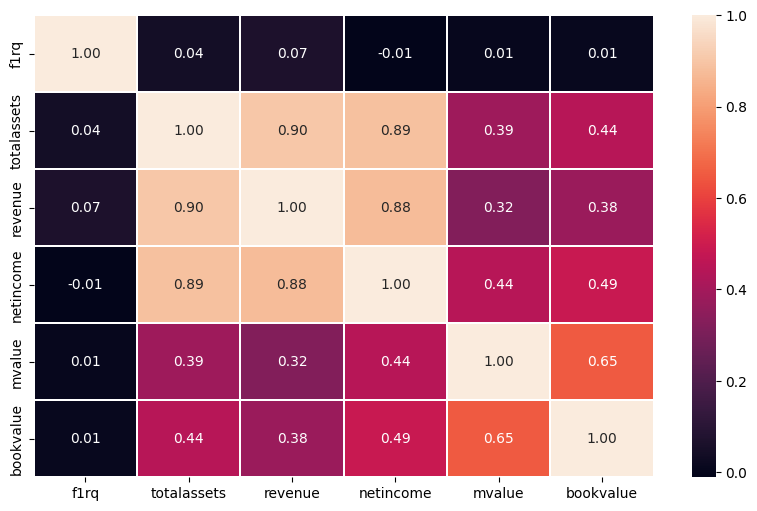

In [107]:
corrMatNums = MIyds[['f1rq','totalassets','revenue','netincome','mvalue','bookvalue']].corr()
print(corrMatNums)
plt.figure(figsize=(10,6))
sns.heatmap(corrMatNums, annot=True, fmt='0.2f',linewidth=0.2)
plt.show()

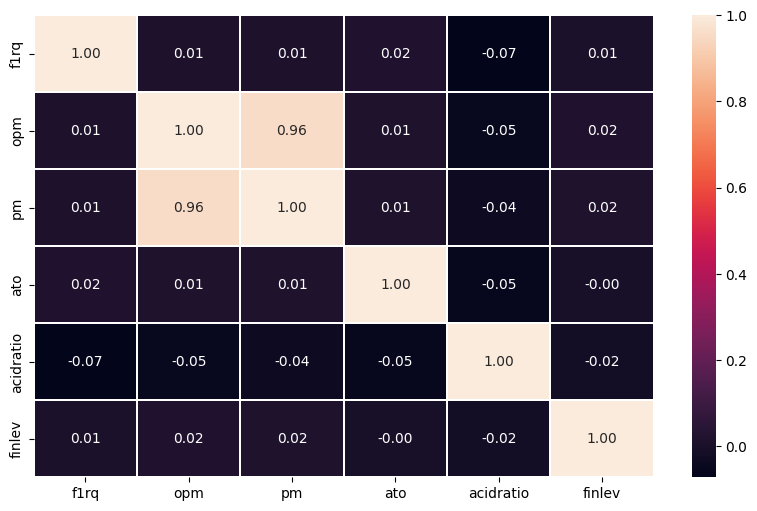

In [86]:
corrMatRatios = MIyds[['f1rq','opm','pm','ato','acidratio','finlev']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrMatRatios, annot=True, fmt='0.2f',linewidth=0.2)
plt.show()

In [114]:
from scipy.stats import pearsonr

l = ['totalassets','revenue','netincome','mvalue','bookvalue','opm','pm','ato','acidratio','finlev']
MIyds = MIyds.dropna()
for i in l:
    print(i,', ', pearsonr(MIyds['f1rq'], MIyds[i]))

totalassets ,  PearsonRResult(statistic=-0.01021493679905401, pvalue=0.34687972368404585)
revenue ,  PearsonRResult(statistic=-0.002060866137267598, pvalue=0.8494866910537574)
netincome ,  PearsonRResult(statistic=-0.003848175265790408, pvalue=0.7230710143266563)
mvalue ,  PearsonRResult(statistic=-0.009170541048862375, pvalue=0.39840140357168774)
bookvalue ,  PearsonRResult(statistic=-0.011226853874436879, pvalue=0.3012070203416216)
opm ,  PearsonRResult(statistic=-0.03208185495028202, pvalue=0.0031267659274954373)
pm ,  PearsonRResult(statistic=0.04154874938502912, pvalue=0.00012937982828892453)
ato ,  PearsonRResult(statistic=0.003785363394036646, pvalue=0.7274095920331322)
acidratio ,  PearsonRResult(statistic=-0.021523173260265288, pvalue=0.04745979217913837)
finlev ,  PearsonRResult(statistic=-0.021694026040851383, pvalue=0.045726184977033964)


In [112]:
MIyds.isna().sum()

rq             0
f1rq           0
ry             0
f4rq           0
totalassets    0
revenue        0
netincome      0
opm            0
pm             0
ato            0
acidratio      0
finlev         0
mvalue         0
bookvalue      0
dtype: int64

In [110]:
MIyds.isin([-np.inf,np.inf]).sum()

rq             0
f1rq           0
ry             0
f4rq           0
totalassets    0
revenue        0
netincome      0
opm            0
pm             0
ato            0
acidratio      0
finlev         0
mvalue         0
bookvalue      0
dtype: int64

Select 2-3 variables and 2-3 ratios with the strongest correlation with future log quarterly returns and do the following:

SELECTED VARIABLES:  REVENUE, OPM

Do histograms for each factor/variables and interpret them

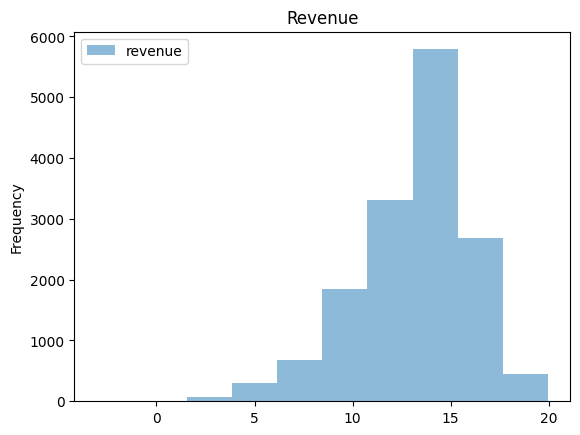

In [89]:
# Revenue

revy = pd.DataFrame(MIyds[['revenue']])
hist = revy.plot.hist(alpha=0.5,title="Revenue")

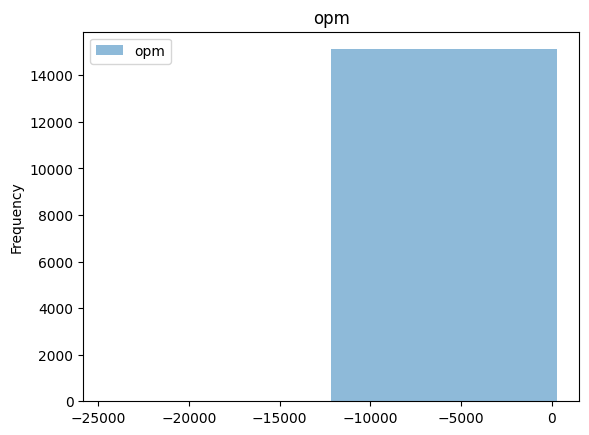

In [90]:
opmy = pd.DataFrame(MIyds[['opm']])
hist = opmy.plot.hist(bins=2 ,alpha=0.5,title="opm")

Do plots to visualize the possible relationship each factor might have with quarterly returns (the dependent variable).

In [105]:
from IPython.display import Markdown
import warnings
warnings.filterwarnings('ignore')

['acidratio', 'ato', 'bookvalue', 'f1rq', 'finlev', 'mvalue', 'netincome', 'opm', 'pm', 'revenue', 'totalassets']


## acidratio

### acidratio vs ato, bookvalue, f1rq, finlev, mvalue

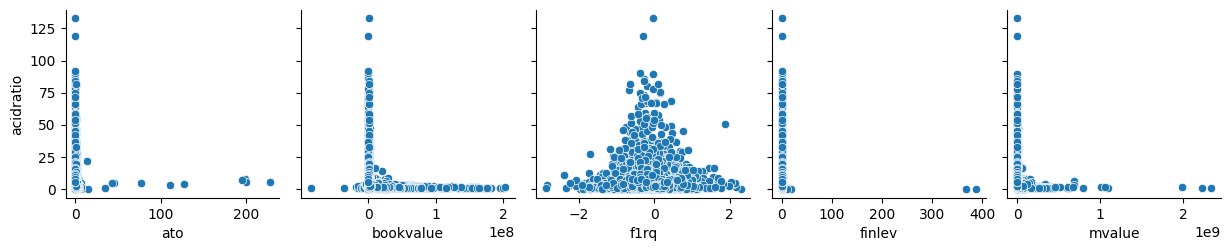

### acidratio vs netincome, opm, pm, revenue, totalassets

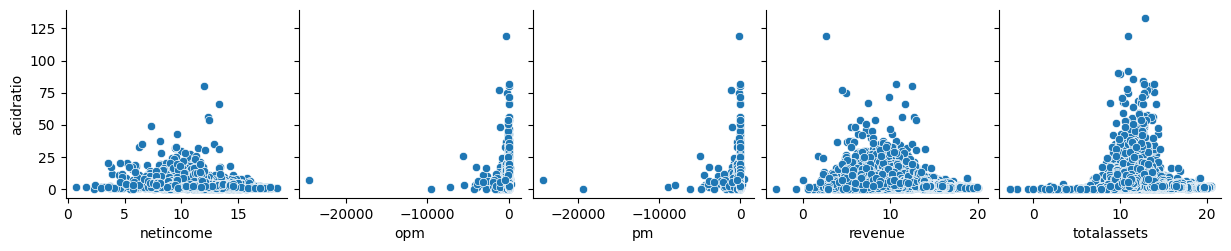

## ato

### ato vs acidratio, bookvalue, f1rq, finlev, mvalue

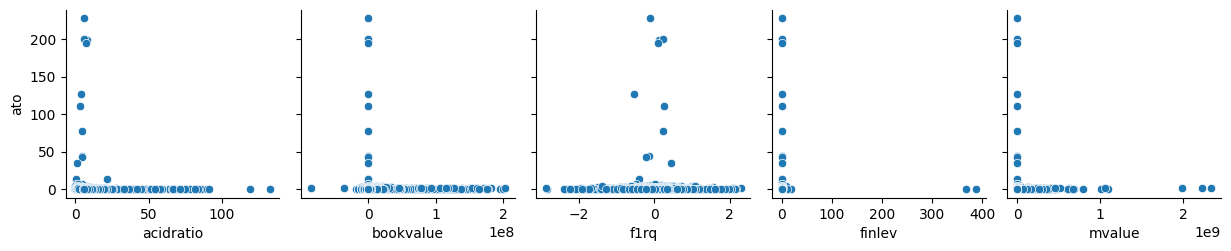

### ato vs netincome, opm, pm, revenue, totalassets

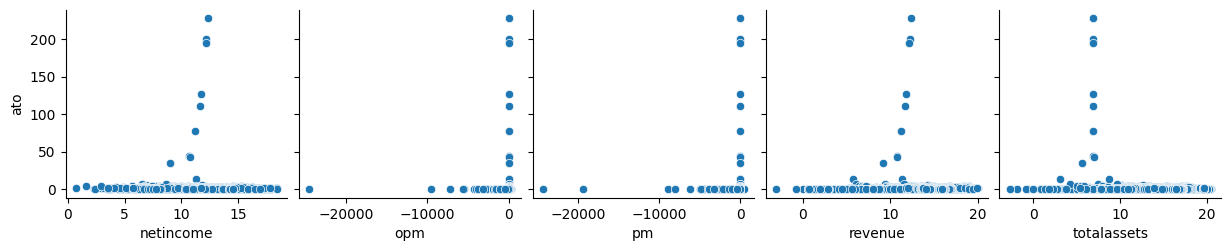

## bookvalue

### bookvalue vs acidratio, ato, f1rq, finlev, mvalue

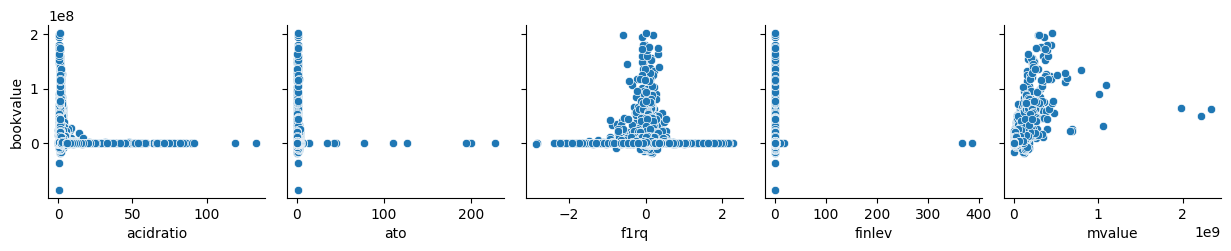

### bookvalue vs netincome, opm, pm, revenue, totalassets

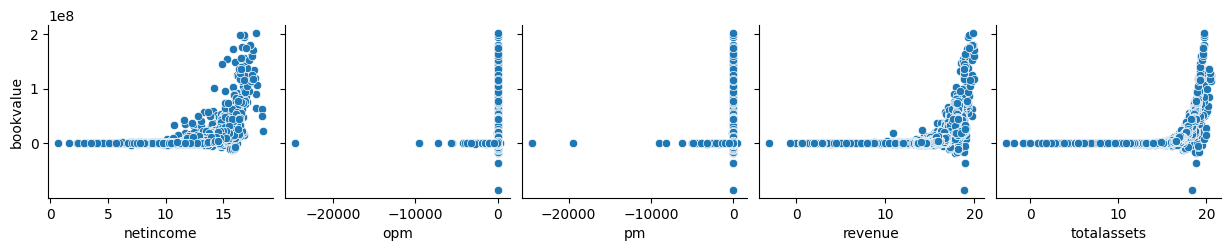

## f1rq

### f1rq vs acidratio, ato, bookvalue, finlev, mvalue

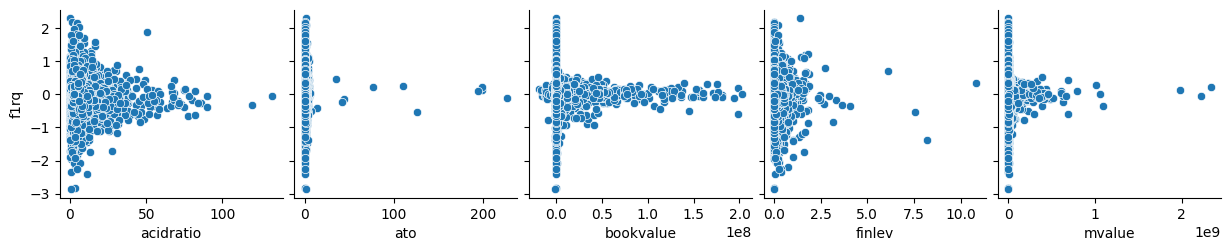

### f1rq vs netincome, opm, pm, revenue, totalassets

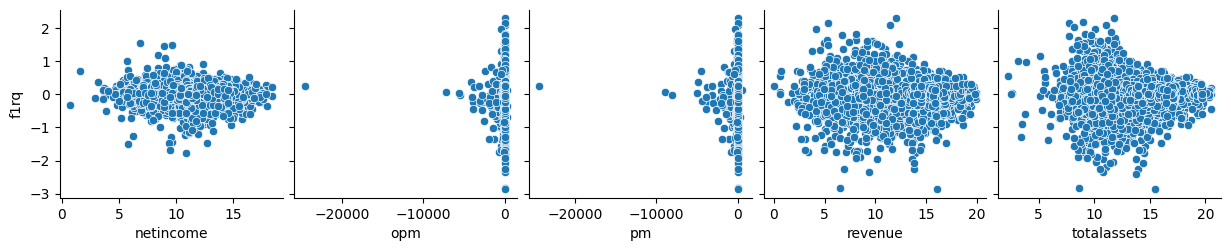

## finlev

### finlev vs acidratio, ato, bookvalue, f1rq, mvalue

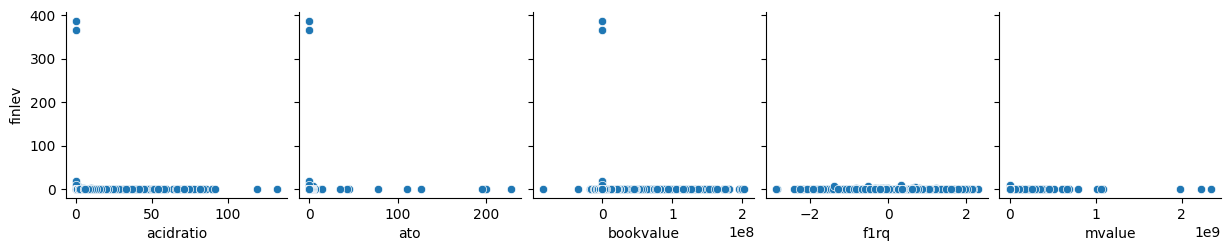

### finlev vs netincome, opm, pm, revenue, totalassets

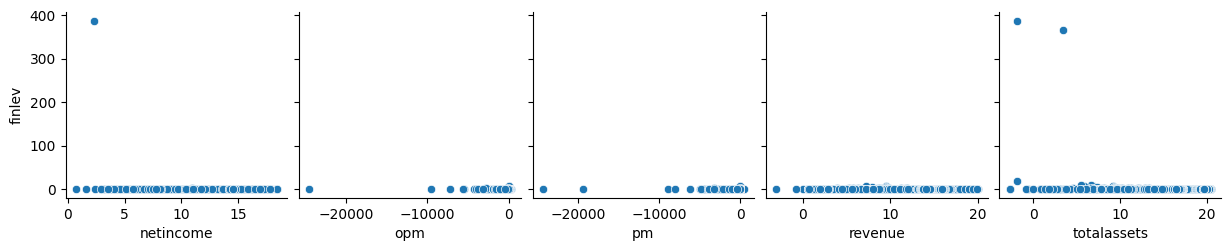

## mvalue

### mvalue vs acidratio, ato, bookvalue, f1rq, finlev

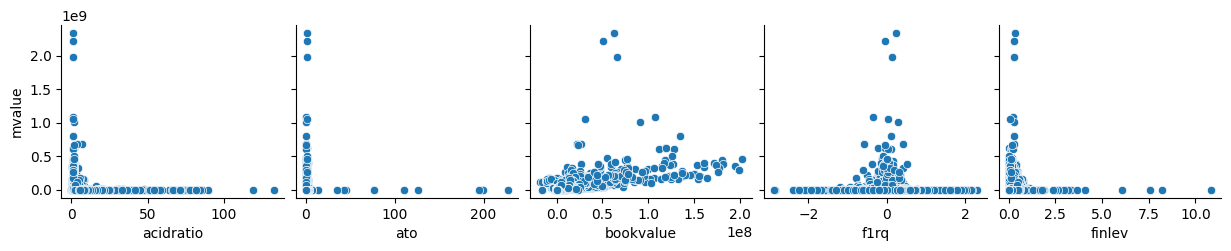

### mvalue vs netincome, opm, pm, revenue, totalassets

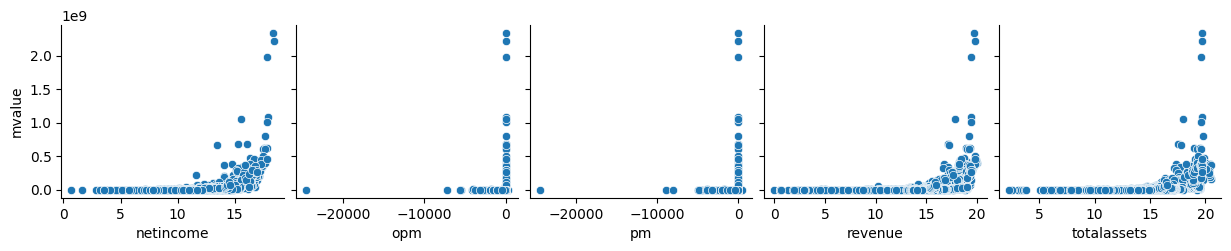

## netincome

### netincome vs acidratio, ato, bookvalue, f1rq, finlev

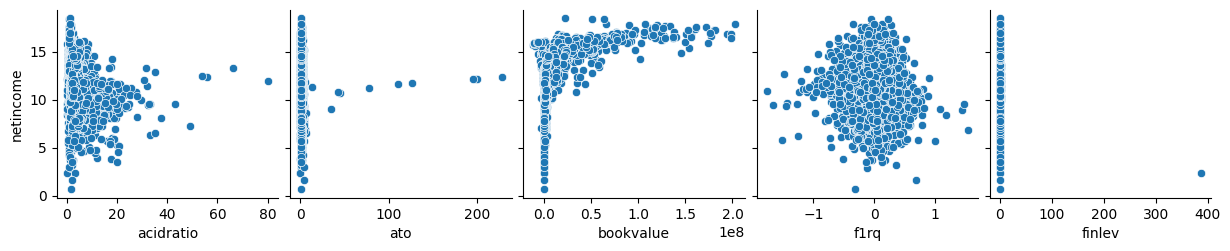

### netincome vs mvalue, opm, pm, revenue, totalassets

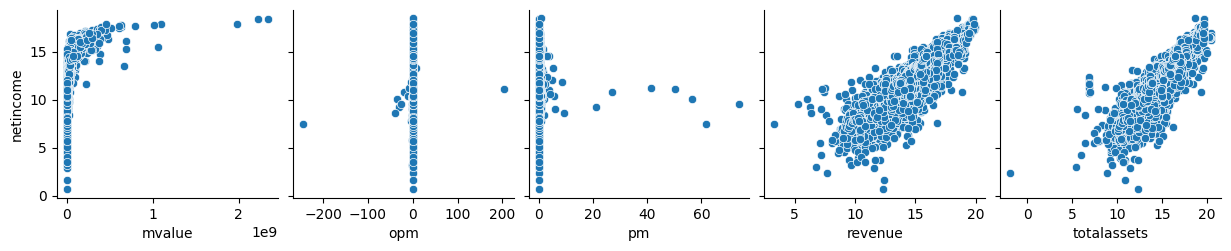

## opm

### opm vs acidratio, ato, bookvalue, f1rq, finlev

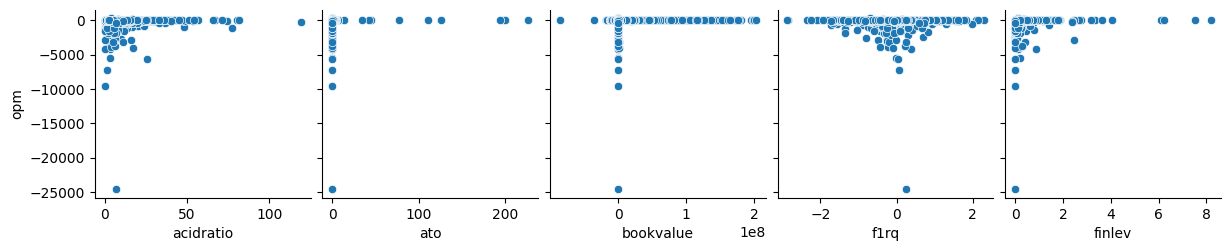

### opm vs mvalue, netincome, pm, revenue, totalassets

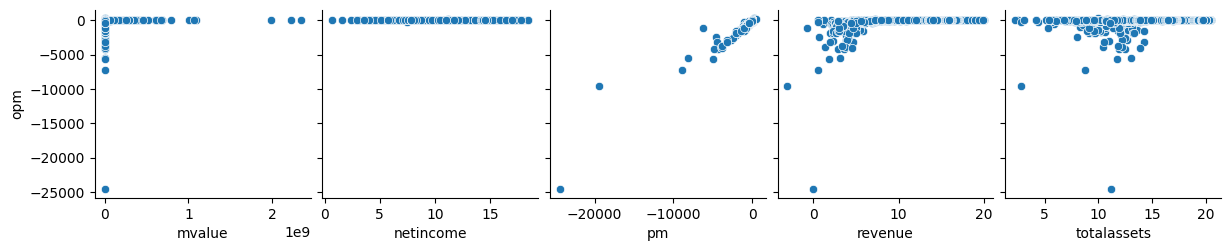

## pm

### pm vs acidratio, ato, bookvalue, f1rq, finlev

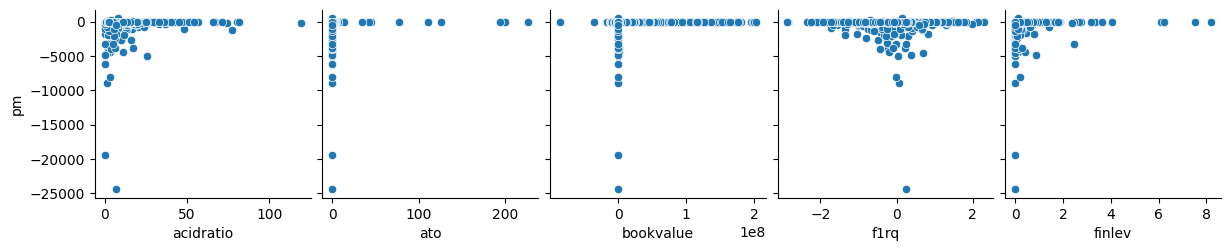

### pm vs mvalue, netincome, opm, revenue, totalassets

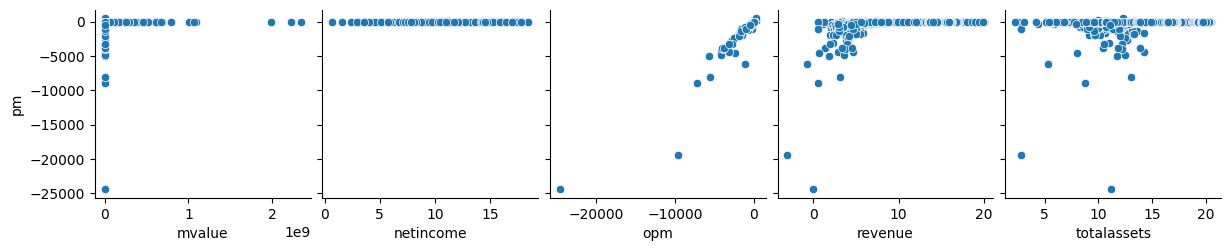

## revenue

### revenue vs acidratio, ato, bookvalue, f1rq, finlev

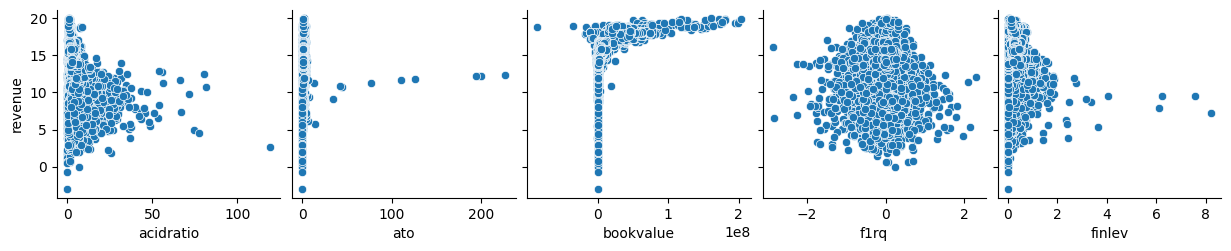

### revenue vs mvalue, netincome, opm, pm, totalassets

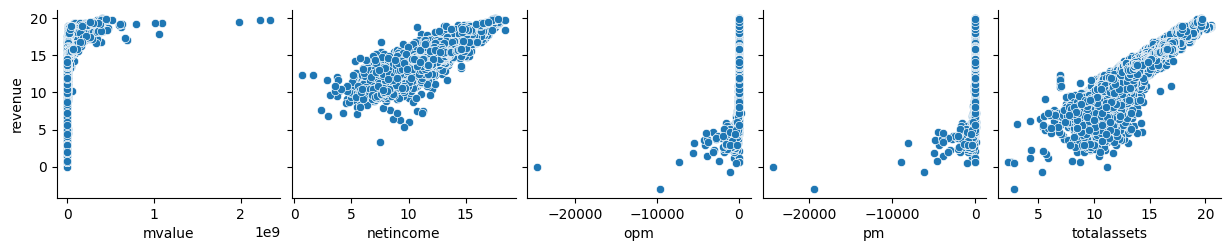

## totalassets

### totalassets vs acidratio, ato, bookvalue, f1rq, finlev

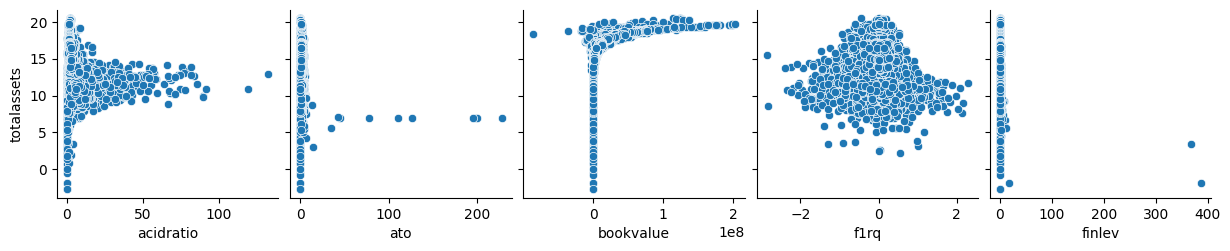

### totalassets vs mvalue, netincome, opm, pm, revenue

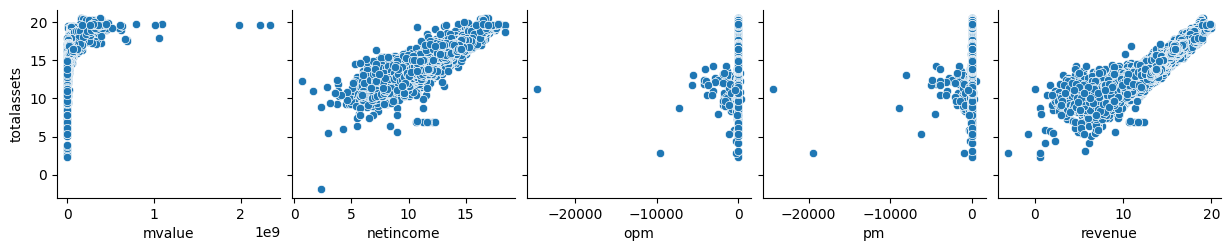

In [106]:
#df2 = MIyds[['f1rq','opm','revenue']]
df2 = MIyds.copy()

df2=df2.reset_index()
df2 = df2.drop(['firm', 'qdate','rq',	'ry',	'f4rq'], axis=1)
#df2


vars_per_line = 5
hue = 'label'
all_vars = list(df2.columns.symmetric_difference([hue]))
#print(all_vars)
all_vars.remove("label")
print(all_vars)

for var in all_vars:
    rest_vars = list(all_vars)
    rest_vars.remove(var)
    display(Markdown(f"## {var}"))
    while rest_vars:
        line_vars = rest_vars[:vars_per_line]
        del rest_vars[:vars_per_line]
        line_var_names = ", ".join(line_vars)
        display(Markdown(f"### {var} vs {line_var_names}"))
        sns.pairplot(df2, x_vars=line_vars, y_vars=[var], palette='bright', )
        plt.show()
        plt.close()

# plt.figure(figsize=(20,6))
# sns.pairplot(df2,diag_kind='kde')
# plt.show()


Design and run a first version of a multiple regression model to examine whether your selected factors can explain/predict quarterly stock returns.

In [93]:
import statsmodels.api as sm
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
regm = MIyds.copy()
regm = regm.dropna()
x = regm[['opm','pm','ato','revenue','netincome','bookvalue']]
X = sm.add_constant(x)
#X=X.dropna()
# I estimate the OLS regression model:
y = regm[['f1rq']]
#y=y.dropna()

mkmodel = sm.OLS(y,X).fit()
# I display the summary of the regression: 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.753
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           0.000986
Time:                        14:42:08   Log-Likelihood:                 1537.5
No. Observations:                8482   AIC:                            -3061.
Df Residuals:                    8475   BIC:                            -3012.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0091      0.021     -0.443      0.6

You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

Once you corrected your variables/ratios with winsorization (in case you did it) and addressed possible multicollienarity problems, run a final multiple regression model

In [ ]:
regm = MIyds.copy()
regm = regm.dropna()
x = regm[['opm','pm','ato','revenue','netincome','bookvalue']]
X = sm.add_constant(x)
#X=X.dropna()
# I estimate the OLS regression model:
y = regm[['f1rq']]
#y=y.dropna()

mkmodel = sm.OLS(y,X).fit()
# I display the summary of the regression: 
print(mkmodel.summary())

Interpret your model

    Interpret with your own words the results of each coefficient (beta and their statistical significance)

    Interpret the R-squared of the model

    Write a conclusion of your results
